In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_train = X_train / 255.0

In [7]:
X_test = X_test / 255.0

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_trained = to_categorical(y_train)

In [10]:
y_tested = to_categorical(y_test)

In [11]:
y_trained.shape

(60000, 10)

In [12]:
y_tested.shape

(10000, 10)

In [13]:
X_train = X_train.reshape(-1,28,28,1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape(-1,28,28,1)

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = tf.keras.models.Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,verbose=1,mode='min')

In [21]:
model.fit(X_train,y_trained,epochs=10,
         validation_data=(X_test,y_tested),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1370 - accuracy: 0.9582 - val_loss: 0.0554 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0434 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0395 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0449 - val_accuracy: 0.9850
Epoch 00004: early stopping


In [22]:
df = pd.DataFrame(model.history.history)

In [23]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.136960,0.958200,0.055356,0.9821
1,0.046097,0.985333,0.043365,0.9851
2,0.029851,0.990783,0.039522,0.9877
3,0.019073,0.993833,0.044868,0.9850


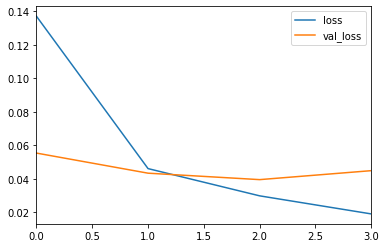

In [24]:
df[['loss','val_loss']].plot()

In [25]:
loss, accuracy = model.evaluate(X_test,y_tested)

313/313 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9850


In [26]:
print(accuracy)

0.9850000143051147


In [28]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.99     10000



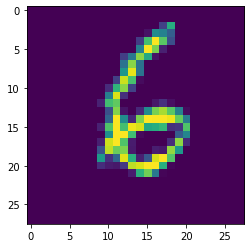

In [33]:
test = X_test[2000]
plt.imshow(test.reshape(28,28))

In [35]:
model.predict_classes(test.reshape(1,28,28,1))

array([6])